# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional halfspace dataset, then transfer rules to a NEW instance, and train / test that on the same dataset type but with fixed rules.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
if 1:
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=False,
                          update_all_edges=True)
else:
    # Same as paper.
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 32  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 16  # Number of nodes firing per layer.

# Training config.
num_runs = 5
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 3
downstream_backprop = True
dataset_up = 'halfspace'
dataset_down = 'halfspace'

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, w, p, cap, 1, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, w, p, cap, 1, options=opts_down, update_scheme=scheme)

In [4]:
# Evaluate model.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 5...
Meta-learning on halfspace...


100%|██████████| 50/50 [00:52<00:00,  1.05s/it]
../LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  5%|▌         | 78/1500 [00:00<00:01, 774.66it/s]

Last loss: 0.3437
Last train accuracy: 0.9873
Last test accuracy: 0.9920
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4953
INITIAL test accuracy: 0.4040
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5440
Last train accuracy: 0.7927
Last test accuracy: 0.7800
Training accuracies:
[0.7387 0.752  0.7367 0.788  0.862  0.8913 0.952  0.9147 0.96   0.9473
 0.938  0.962  0.932  0.938  0.9613 0.9767 0.9427 0.9647 0.9747 0.974
 0.9853 0.966  0.974  0.9753 0.9733 0.974  0.97   0.9713 0.988  0.9833
 0.982  0.988  0.9713 0.9747 0.9787 0.9707 0.976  0.9613 0.9753 0.9747
 0.982  0.98   0.976  0.9733 0.9793 0.98   0.9833 0.986  0.9773 0.9873]


Run 2 / 5...
Meta-learning on halfspace...


  6%|▋         | 95/1500 [00:00<00:01, 949.15it/s]

Last loss: 0.3442
Last train accuracy: 0.9800
Last test accuracy: 0.9680
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6680
INITIAL test accuracy: 0.6840
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5680
Last train accuracy: 0.7287
Last test accuracy: 0.6860
Training accuracies:
[0.6847 0.8353 0.758  0.8747 0.9187 0.936  0.9453 0.9413 0.948  0.9513
 0.9427 0.966  0.9713 0.9653 0.96   0.9647 0.9627 0.9727 0.9727 0.9627
 0.974  0.9647 0.9833 0.984  0.9787 0.9833 0.9753 0.9833 0.976  0.9853
 0.9807 0.9667 0.986  0.9793 0.9727 0.9767 0.982  0.9793 0.9847 0.9767
 0.9853 0.97   0.982  0.9707 0.976  0.9853 0.9833 0.9753 0.9887 0.98  ]


Run 3 / 5...
Meta-learning on halfspace...


  6%|▋         | 96/1500 [00:00<00:01, 959.04it/s]

Last loss: 0.3414
Last train accuracy: 0.9880
Last test accuracy: 0.9940
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5740
INITIAL test accuracy: 0.5720
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5279
Last train accuracy: 0.7973
Last test accuracy: 0.7920
Training accuracies:
[0.802  0.7867 0.8547 0.8227 0.8813 0.866  0.934  0.936  0.95   0.9413
 0.9193 0.9647 0.9567 0.9533 0.9773 0.9727 0.938  0.9633 0.9707 0.9787
 0.9673 0.966  0.9747 0.968  0.9793 0.9827 0.98   0.9833 0.9833 0.9767
 0.9793 0.9807 0.99   0.988  0.9887 0.982  0.978  0.9747 0.968  0.9793
 0.9847 0.986  0.988  0.9667 0.9867 0.976  0.9853 0.986  0.9887 0.988 ]


Run 4 / 5...
Meta-learning on halfspace...


  7%|▋         | 99/1500 [00:00<00:01, 986.11it/s]

Last loss: 0.3440
Last train accuracy: 0.9773
Last test accuracy: 0.9660
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5080
INITIAL test accuracy: 0.4900
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5310
Last train accuracy: 0.7900
Last test accuracy: 0.8060
Training accuracies:
[0.7213 0.7287 0.7693 0.8093 0.836  0.928  0.928  0.9573 0.9433 0.9473
 0.9607 0.9627 0.9647 0.962  0.9693 0.9773 0.9793 0.974  0.9427 0.972
 0.9613 0.9733 0.9713 0.98   0.9767 0.9753 0.9833 0.9767 0.9647 0.9733
 0.9813 0.986  0.9873 0.9827 0.9833 0.972  0.9793 0.9833 0.984  0.9707
 0.9873 0.9793 0.9753 0.9827 0.9853 0.9847 0.9687 0.988  0.978  0.9773]


Run 5 / 5...
Meta-learning on halfspace...


  7%|▋         | 102/1500 [00:00<00:01, 1016.84it/s]

Last loss: 0.3437
Last train accuracy: 0.9800
Last test accuracy: 0.9800
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5360
INITIAL test accuracy: 0.5200
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:01<00:00, 964.82it/s] 


Last loss: 0.5633
Last train accuracy: 0.7380
Last test accuracy: 0.7440
Training accuracies:
[0.6227 0.7187 0.6867 0.6953 0.736  0.8007 0.8953 0.9207 0.9513 0.9573
 0.9687 0.9713 0.966  0.98   0.98   0.9733 0.9613 0.9867 0.9813 0.9853
 0.9807 0.9673 0.9733 0.9793 0.9753 0.974  0.9673 0.966  0.9673 0.9807
 0.978  0.988  0.9773 0.9753 0.9693 0.974  0.9807 0.974  0.982  0.9727
 0.984  0.9747 0.9713 0.9667 0.9787 0.9833 0.9787 0.97   0.978  0.98  ]



Saving figure to: figs/comparing_transfer_rnn_halfspace


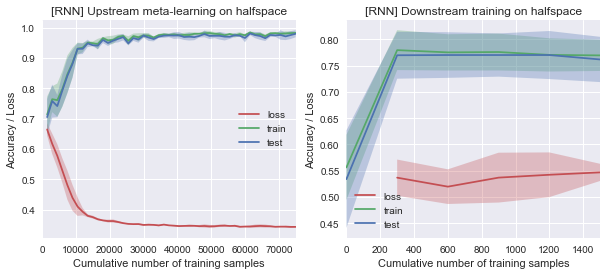

Mean essential stats across all runs:
Last upstream loss: 0.3434
Last upstream train accuracy: 0.9825
Last upstream test accuracy: 0.9800
Last downstream loss: 0.5468
Last downstream train accuracy: 0.7693
Last downstream test accuracy: 0.7616



In [5]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset_up,
            '[RNN] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_rnn_' + dataset_up)

## Evaluate all table-based feed-forward networks.

In [6]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PrePost() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PrePost() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PrePostCount() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PrePostCount() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PrePostPercent() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PrePostPercent() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PostCount() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PostCount() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)

In [7]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream,
    min_upstream_acc=0.4)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 5...
Meta-learning on halfspace...


  8%|▊         | 115/1500 [00:00<00:01, 1142.43it/s]

Last loss: 0.3460
Last train accuracy: 0.9833
Last test accuracy: 0.9600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5000
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5423
Last train accuracy: 0.7247
Last test accuracy: 0.7580
Training accuracies:
[0.734  0.7027 0.7107 0.74   0.7267 0.816  0.7993 0.8367 0.878  0.8827
 0.8907 0.9153 0.9047 0.9073 0.9293 0.942  0.952  0.9507 0.934  0.954
 0.9547 0.9587 0.9693 0.962  0.9667 0.964  0.9693 0.962  0.9707 0.9587
 0.9527 0.974  0.9707 0.966  0.9713 0.9613 0.9667 0.9787 0.9587 0.9647
 0.9747 0.9727 0.9727 0.9747 0.978  0.9753 0.97   0.98   0.9667 0.9833]


Run 2 / 5...
Meta-learning on halfspace...


  8%|▊         | 126/1500 [00:00<00:01, 1256.11it/s]

Last loss: 0.3536
Last train accuracy: 0.9533
Last test accuracy: 0.9640
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4927
INITIAL test accuracy: 0.4900
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6233
Last train accuracy: 0.7513
Last test accuracy: 0.7400
Training accuracies:
[0.5487 0.6187 0.6633 0.656  0.6873 0.8007 0.8467 0.8813 0.9033 0.9247
 0.9233 0.9347 0.9447 0.94   0.9487 0.9453 0.954  0.9593 0.9533 0.9527
 0.95   0.956  0.9553 0.956  0.958  0.962  0.96   0.9607 0.9647 0.9667
 0.9693 0.9653 0.9627 0.9693 0.9647 0.9607 0.956  0.962  0.972  0.97
 0.9747 0.9667 0.958  0.9567 0.9647 0.98   0.9633 0.974  0.972  0.9533]


Run 3 / 5...
Meta-learning on halfspace...


  6%|▌         | 93/1500 [00:00<00:01, 927.02it/s]

Last loss: 0.3574
Last train accuracy: 0.9627
Last test accuracy: 0.9440
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4907
INITIAL test accuracy: 0.4880
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5833
Last train accuracy: 0.7867
Last test accuracy: 0.8120
Training accuracies:
[0.722  0.7833 0.744  0.7453 0.7827 0.8227 0.7887 0.8413 0.844  0.8913
 0.8913 0.9207 0.91   0.9413 0.9413 0.9373 0.9487 0.9473 0.942  0.964
 0.9593 0.9627 0.9587 0.964  0.946  0.962  0.95   0.968  0.9613 0.9647
 0.958  0.9733 0.966  0.9653 0.95   0.9613 0.9633 0.9607 0.9533 0.9547
 0.9733 0.9647 0.9707 0.9327 0.9653 0.97   0.9647 0.956  0.956  0.9627]


Run 4 / 5...
Meta-learning on halfspace...


  8%|▊         | 125/1500 [00:00<00:01, 1246.17it/s]

Last loss: 0.3414
Last train accuracy: 0.9800
Last test accuracy: 0.9460
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4960
INITIAL test accuracy: 0.5060
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5099
Last train accuracy: 0.8013
Last test accuracy: 0.7860
Training accuracies:
[0.7    0.672  0.7187 0.796  0.7947 0.8513 0.8387 0.908  0.9127 0.934
 0.932  0.9407 0.9293 0.9433 0.9633 0.938  0.9627 0.9673 0.9647 0.968
 0.9707 0.9713 0.978  0.968  0.9727 0.9767 0.9773 0.9793 0.9767 0.974
 0.9733 0.9693 0.974  0.9747 0.9733 0.9567 0.964  0.982  0.966  0.9807
 0.974  0.982  0.9767 0.9867 0.976  0.9787 0.9767 0.9807 0.9713 0.98  ]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 123/1500 [00:00<00:01, 1226.55it/s]

Last loss: 0.3553
Last train accuracy: 0.9693
Last test accuracy: 0.9400
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4880
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5933
Last train accuracy: 0.7453
Last test accuracy: 0.7780
Training accuracies:
[0.7793 0.7873 0.7687 0.8527 0.8593 0.8293 0.8507 0.884  0.88   0.8813
 0.9213 0.8953 0.9267 0.8867 0.9213 0.9347 0.9453 0.95   0.962  0.9447
 0.9613 0.9553 0.9653 0.9627 0.9633 0.9627 0.966  0.9653 0.9673 0.9713
 0.9733 0.976  0.9587 0.9533 0.9673 0.9693 0.9733 0.97   0.9733 0.9527
 0.974  0.9673 0.9733 0.9533 0.9667 0.96   0.9673 0.97   0.9613 0.9693]

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 5...
Meta-learning on halfspace...


  8%|▊         | 115/1500 [00:00<00:01, 1146.26it/s]

Last loss: 0.3634
Last train accuracy: 0.9660
Last test accuracy: 0.9520
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5100
INITIAL test accuracy: 0.5260
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5799
Last train accuracy: 0.7653
Last test accuracy: 0.7160
Training accuracies:
[0.7547 0.7353 0.7613 0.798  0.8307 0.8487 0.8467 0.9033 0.9153 0.906
 0.9207 0.9407 0.9373 0.942  0.9553 0.9533 0.9393 0.962  0.9567 0.9587
 0.962  0.9573 0.96   0.9573 0.9507 0.9427 0.9607 0.9647 0.9473 0.96
 0.954  0.972  0.9653 0.9653 0.9627 0.9713 0.9633 0.956  0.9553 0.964
 0.95   0.9653 0.9707 0.9727 0.9627 0.946  0.962  0.9713 0.9707 0.966 ]


Run 2 / 5...
Meta-learning on halfspace...


  8%|▊         | 121/1500 [00:00<00:01, 1204.62it/s]

Last loss: 0.3716
Last train accuracy: 0.9433
Last test accuracy: 0.9220
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4873
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6378
Last train accuracy: 0.6987
Last test accuracy: 0.7140
Training accuracies:
[0.76   0.756  0.7833 0.77   0.8087 0.868  0.8867 0.908  0.9153 0.8773
 0.9373 0.95   0.942  0.944  0.9387 0.9427 0.95   0.958  0.966  0.9393
 0.9667 0.9673 0.9647 0.958  0.968  0.9307 0.9693 0.9667 0.8933 0.946
 0.9313 0.9513 0.9727 0.9667 0.9667 0.96   0.956  0.944  0.97   0.95
 0.966  0.956  0.9553 0.958  0.9687 0.962  0.9547 0.9347 0.93   0.9433]


Run 3 / 5...
Meta-learning on halfspace...


  8%|▊         | 121/1500 [00:00<00:01, 1209.15it/s]

Last loss: 0.3681
Last train accuracy: 0.9640
Last test accuracy: 0.9580
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5113
INITIAL test accuracy: 0.4940
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6033
Last train accuracy: 0.7240
Last test accuracy: 0.7240
Training accuracies:
[0.5107 0.7513 0.7307 0.7313 0.7093 0.7653 0.864  0.894  0.9047 0.8907
 0.9173 0.932  0.936  0.938  0.9433 0.958  0.9533 0.958  0.952  0.9633
 0.9373 0.9687 0.9533 0.976  0.96   0.9533 0.9707 0.9613 0.9707 0.9687
 0.968  0.9407 0.9673 0.9727 0.9667 0.9507 0.974  0.972  0.9647 0.9787
 0.964  0.952  0.974  0.9667 0.982  0.962  0.974  0.952  0.968  0.964 ]


Run 4 / 5...
Meta-learning on halfspace...


  8%|▊         | 114/1500 [00:00<00:01, 1137.24it/s]

Last loss: 0.3647
Last train accuracy: 0.9713
Last test accuracy: 0.9600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4833
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5784
Last train accuracy: 0.7493
Last test accuracy: 0.7660
Training accuracies:
[0.7447 0.6913 0.6233 0.794  0.882  0.8787 0.8953 0.9373 0.9313 0.922
 0.9233 0.946  0.928  0.9267 0.9313 0.942  0.9607 0.968  0.9527 0.956
 0.9593 0.9587 0.9307 0.9727 0.948  0.9687 0.976  0.9747 0.968  0.968
 0.942  0.946  0.976  0.9747 0.9827 0.974  0.9707 0.9733 0.9573 0.972
 0.9667 0.976  0.9673 0.972  0.9727 0.954  0.982  0.9687 0.9607 0.9713]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 115/1500 [00:00<00:01, 1143.26it/s]

Last loss: 0.3690
Last train accuracy: 0.9593
Last test accuracy: 0.9780
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4940
INITIAL test accuracy: 0.4920
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6082
Last train accuracy: 0.7207
Last test accuracy: 0.7320
Training accuracies:
[0.672  0.726  0.6933 0.792  0.8507 0.882  0.8907 0.9147 0.884  0.9413
 0.9293 0.9293 0.9487 0.9373 0.958  0.9533 0.9653 0.9647 0.952  0.9587
 0.9607 0.97   0.9587 0.9647 0.9493 0.9627 0.96   0.9653 0.9607 0.9587
 0.9367 0.958  0.9693 0.968  0.9653 0.9687 0.97   0.966  0.9713 0.9673
 0.972  0.9647 0.9693 0.954  0.9587 0.9627 0.9673 0.9693 0.9687 0.9593]

==== Interpretation: Pre and Post and Binned Incoming Fraction ====

Run 1 / 5...
Meta-learning on halfspace...


  6%|▌         | 93/1500 [00:00<00:01, 921.63it/s]

Last loss: 0.3717
Last train accuracy: 0.9540
Last test accuracy: 0.9540
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4973
INITIAL test accuracy: 0.5320
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4633
Last train accuracy: 0.8400
Last test accuracy: 0.8560
Training accuracies:
[0.724  0.7127 0.7027 0.7613 0.6753 0.8093 0.8247 0.812  0.856  0.828
 0.8907 0.9033 0.892  0.9    0.894  0.9    0.8947 0.9227 0.9113 0.9493
 0.9207 0.9353 0.9247 0.9533 0.93   0.9387 0.9453 0.9493 0.9433 0.9533
 0.9247 0.9573 0.95   0.9587 0.9527 0.9593 0.954  0.952  0.954  0.9593
 0.95   0.96   0.9653 0.9553 0.9527 0.9633 0.9533 0.9587 0.9553 0.954 ]


Run 2 / 5...
Meta-learning on halfspace...


  7%|▋         | 108/1500 [00:00<00:01, 1078.80it/s]

Last loss: 0.3622
Last train accuracy: 0.9687
Last test accuracy: 0.9480
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5073
INITIAL test accuracy: 0.4920
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5295
Last train accuracy: 0.7373
Last test accuracy: 0.7400
Training accuracies:
[0.8293 0.808  0.8367 0.84   0.7833 0.842  0.8567 0.8833 0.8993 0.904
 0.9367 0.944  0.9453 0.9553 0.9687 0.9493 0.9673 0.958  0.9633 0.9693
 0.9453 0.9747 0.9267 0.9707 0.9627 0.972  0.9667 0.972  0.9733 0.97
 0.9733 0.956  0.9773 0.9633 0.9727 0.9593 0.9747 0.97   0.9753 0.96
 0.924  0.9733 0.974  0.9527 0.9633 0.9733 0.97   0.9667 0.9793 0.9687]


Run 3 / 5...
Meta-learning on halfspace...


  8%|▊         | 117/1500 [00:00<00:01, 1168.13it/s]

Last loss: 0.3633
Last train accuracy: 0.9653
Last test accuracy: 0.9340
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5133
INITIAL test accuracy: 0.4940
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5262
Last train accuracy: 0.7733
Last test accuracy: 0.7740
Training accuracies:
[0.6987 0.706  0.742  0.744  0.726  0.79   0.842  0.8627 0.8347 0.8827
 0.894  0.9187 0.896  0.9253 0.94   0.9273 0.9307 0.9473 0.9567 0.9647
 0.958  0.9547 0.9707 0.948  0.968  0.9487 0.9633 0.9727 0.954  0.9593
 0.9567 0.97   0.978  0.97   0.9627 0.966  0.9633 0.9627 0.9647 0.972
 0.9633 0.9687 0.964  0.9767 0.9587 0.97   0.97   0.9727 0.98   0.9653]


Run 4 / 5...
Meta-learning on halfspace...


  8%|▊         | 113/1500 [00:00<00:01, 1126.95it/s]

Last loss: 0.3526
Last train accuracy: 0.9840
Last test accuracy: 0.9740
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.5160
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5332
Last train accuracy: 0.7627
Last test accuracy: 0.7620
Training accuracies:
[0.7093 0.7593 0.736  0.8433 0.8993 0.9133 0.912  0.926  0.938  0.954
 0.9553 0.9513 0.956  0.956  0.9373 0.9813 0.984  0.982  0.9767 0.9753
 0.9647 0.9553 0.9707 0.9747 0.98   0.984  0.9807 0.9813 0.9687 0.9787
 0.982  0.9773 0.9867 0.9747 0.9687 0.9727 0.9827 0.9853 0.974  0.976
 0.98   0.9833 0.9833 0.9813 0.9913 0.9867 0.9853 0.9827 0.9753 0.984 ]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 113/1500 [00:00<00:01, 1121.12it/s]

Last loss: 0.3599
Last train accuracy: 0.9727
Last test accuracy: 0.9560
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4987
INITIAL test accuracy: 0.4820
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6230
Last train accuracy: 0.6933
Last test accuracy: 0.6940
Training accuracies:
[0.6847 0.694  0.6907 0.712  0.7633 0.7587 0.798  0.824  0.8467 0.8947
 0.916  0.918  0.9473 0.9127 0.93   0.9427 0.9547 0.9493 0.9347 0.9513
 0.964  0.964  0.9713 0.948  0.9713 0.9573 0.97   0.948  0.9547 0.968
 0.97   0.9673 0.956  0.964  0.972  0.976  0.948  0.954  0.948  0.962
 0.9653 0.9713 0.9707 0.9767 0.974  0.976  0.9733 0.97   0.9753 0.9727]

==== Interpretation: Post and Incoming Count ====

Run 1 / 5...
Meta-learning on halfspace...


  8%|▊         | 125/1500 [00:00<00:01, 1243.50it/s]

Last loss: 0.6351
Last train accuracy: 0.5100
Last test accuracy: 0.4860
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5400
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7666
Last train accuracy: 0.5400
Last test accuracy: 0.5100
Training accuracies:
[0.49   0.49   0.51   0.49   0.51   0.49   0.49   0.51   0.51   0.49
 0.51   0.51   0.49   0.51   0.49   0.51   0.49   0.49   0.51   0.51
 0.51   0.4873 0.51   0.51   0.51   0.4833 0.51   0.51   0.51   0.51
 0.51   0.51   0.51   0.51   0.51   0.51   0.474  0.4713 0.51   0.4827
 0.4773 0.4667 0.51   0.51   0.4807 0.51   0.51   0.51   0.474  0.51  ]


Run 2 / 5...
Meta-learning on halfspace...


  8%|▊         | 123/1500 [00:00<00:01, 1227.56it/s]

Last loss: 0.6931
Last train accuracy: 0.5060
Last test accuracy: 0.5040
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5033
INITIAL test accuracy: 0.4940
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5033
Last test accuracy: 0.4940
Training accuracies:
[0.494 0.506 0.494 0.506 0.494 0.494 0.494 0.506 0.506 0.494 0.494 0.494
 0.506 0.506 0.494 0.506 0.494 0.506 0.506 0.506 0.506 0.506 0.494 0.506
 0.494 0.506 0.506 0.494 0.494 0.506 0.494 0.506 0.494 0.494 0.506 0.494
 0.494 0.494 0.506 0.494 0.494 0.506 0.494 0.494 0.506 0.506 0.494 0.506
 0.494 0.506]


Run 3 / 5...
Meta-learning on halfspace...


  8%|▊         | 124/1500 [00:00<00:01, 1234.71it/s]

Last loss: 0.6931
Last train accuracy: 0.5000
Last test accuracy: 0.5500
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5080
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5080
Last test accuracy: 0.5100
Training accuracies:
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


Run 4 / 5...
Meta-learning on halfspace...


  9%|▊         | 129/1500 [00:00<00:01, 1282.11it/s]

Last loss: 0.6603
Last train accuracy: 0.5240
Last test accuracy: 0.4740
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4947
INITIAL test accuracy: 0.4960
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7966
Last train accuracy: 0.5053
Last test accuracy: 0.5040
Training accuracies:
[0.5093 0.4907 0.4907 0.5093 0.5093 0.4907 0.4907 0.5093 0.5093 0.4907
 0.4907 0.4907 0.5093 0.5093 0.5093 0.4907 0.4907 0.5093 0.4907 0.5093
 0.4907 0.5093 0.4907 0.51   0.5113 0.5127 0.516  0.514  0.5153 0.51
 0.4907 0.4907 0.4907 0.4907 0.5113 0.5273 0.5133 0.4907 0.5213 0.5127
 0.516  0.5093 0.5127 0.51   0.4907 0.5107 0.5107 0.4907 0.4907 0.524 ]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 120/1500 [00:00<00:01, 1198.11it/s]

Last loss: 0.6117
Last train accuracy: 0.4647
Last test accuracy: 0.5020
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5027
INITIAL test accuracy: 0.5000
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:01<00:00, 1165.11it/s]


Last loss: 0.8151
Last train accuracy: 0.5027
Last test accuracy: 0.5000
Training accuracies:
[0.4647 0.5353 0.5353 0.5353 0.5353 0.4647 0.4647 0.5353 0.5353 0.5353
 0.5353 0.4647 0.5353 0.4647 0.5353 0.5353 0.538  0.5353 0.5353 0.542
 0.5467 0.546  0.5353 0.54   0.5353 0.538  0.5447 0.5353 0.5393 0.5473
 0.4647 0.4647 0.5387 0.5367 0.5433 0.5353 0.536  0.4647 0.5353 0.54
 0.5467 0.54   0.4647 0.5353 0.594  0.4647 0.5467 0.5447 0.54   0.4647]



Saving figure to: figs/comparing_transfer_prepost_halfspace


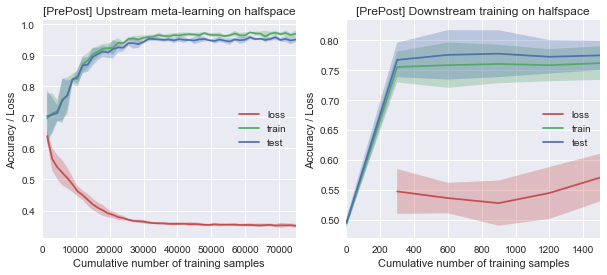

Mean essential stats across all runs:
Last upstream loss: 0.3507
Last upstream train accuracy: 0.9697
Last upstream test accuracy: 0.9508
Last downstream loss: 0.5704
Last downstream train accuracy: 0.7619
Last downstream test accuracy: 0.7748

Saving figure to: figs/comparing_transfer_prepostcount_halfspace


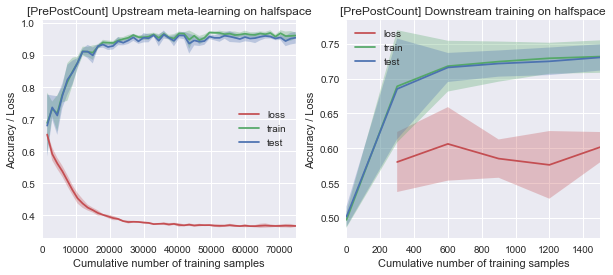

Mean essential stats across all runs:
Last upstream loss: 0.3674
Last upstream train accuracy: 0.9608
Last upstream test accuracy: 0.9540
Last downstream loss: 0.6015
Last downstream train accuracy: 0.7316
Last downstream test accuracy: 0.7304

Saving figure to: figs/comparing_transfer_prepostpercent_halfspace


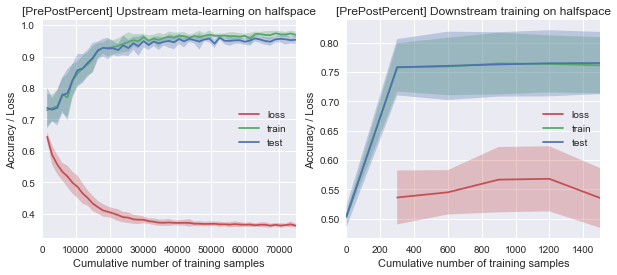

Mean essential stats across all runs:
Last upstream loss: 0.3619
Last upstream train accuracy: 0.9689
Last upstream test accuracy: 0.9532
Last downstream loss: 0.5350
Last downstream train accuracy: 0.7613
Last downstream test accuracy: 0.7652

Saving figure to: figs/comparing_transfer_postcount_halfspace


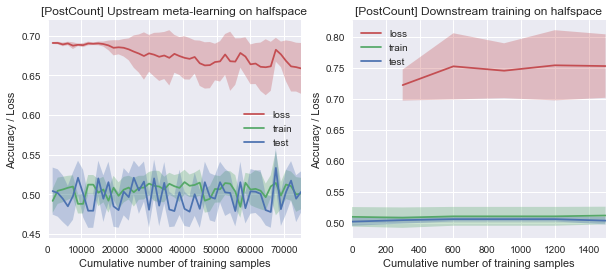

Mean essential stats across all runs:
Last upstream loss: 0.6587
Last upstream train accuracy: 0.5009
Last upstream test accuracy: 0.5032
Last downstream loss: 0.7529
Last downstream train accuracy: 0.5119
Last downstream test accuracy: 0.5036



In [8]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset_up,
            '[PrePost] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepost_' + dataset_up)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepostcount_' + dataset_up)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset_up,
            '[PrePostPercent] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepostpercent_' + dataset_up)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset_up,
            '[PostCount] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_postcount_' + dataset_up)

Saving figure to: figs/comparing_transfer_table_halfspace


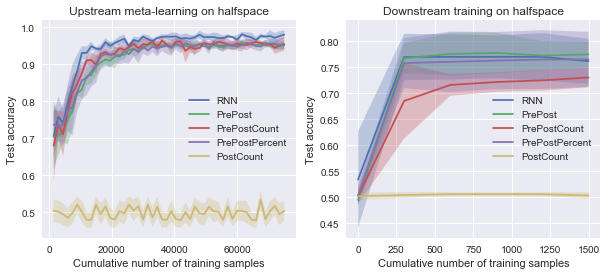

In [9]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/comparing_transfer_table_' + dataset_up)

In [10]:
if 0:
    agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
    agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
    for i in range(len(stats_prepost_up)):
        plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                    '[PrePost] Upstream meta-learning on ' + dataset_up,
                    '[PrePost] Downstream training on ' + dataset_down)

## Evaluate all ANN-based feed-forward networks.

In [3]:
# Instantiate brain factories.
brain_ann_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=OneBetaANNRule_PrePost() if opts_up.use_graph_rule else None,
    output_rule=OneBetaANNRule_PrePost() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_ann_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=OneBetaANNRule_PrePost() if opts_down.use_graph_rule else None,
    output_rule=OneBetaANNRule_PrePost() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)

brain_ann_prepostall_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=OneBetaANNRule_PrePostAll() if opts_up.use_graph_rule else None,
    output_rule=OneBetaANNRule_PrePostAll() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_ann_prepostall_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=OneBetaANNRule_PrePostAll() if opts_down.use_graph_rule else None,
    output_rule=OneBetaANNRule_PrePostAll() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)

brain_ann_onepostall_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=OneBetaANNRule_PostAll() if opts_up.use_graph_rule else None,
    output_rule=OneBetaANNRule_PostAll() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_ann_onepostall_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=OneBetaANNRule_PostAll() if opts_down.use_graph_rule else None,
    output_rule=OneBetaANNRule_PostAll() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)

brain_ann_allpostall_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=AllBetasANNRule_PostAll() if opts_up.use_graph_rule else None,
    output_rule=AllBetasANNRule_PostAll() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_ann_allpostall_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=AllBetasANNRule_PostAll() if opts_down.use_graph_rule else None,
    output_rule=AllBetasANNRule_PostAll() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)

In [4]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_ann_prepost_up, stats_ann_prepost_down = evaluate_up_down(
    brain_ann_prepost_up_fact, brain_ann_prepost_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre, Post and All Incoming ====')
stats_ann_prepostall_up, stats_ann_prepostall_down = evaluate_up_down(
    brain_ann_prepostall_up_fact, brain_ann_prepostall_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: One Beta, Post and All Incoming ====')
stats_ann_onepostall_up, stats_ann_onepostall_down = evaluate_up_down(
    brain_ann_onepostall_up_fact, brain_ann_onepostall_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream,
    min_upstream_acc=0.4)
print('==== Interpretation: All Betas, Post and All Incoming ====')
stats_ann_allpostall_up, stats_ann_allpostall_down = evaluate_up_down(
    brain_ann_allpostall_up_fact, brain_ann_allpostall_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 5...
Meta-learning on halfspace...


  5%|▌         | 78/1500 [00:00<00:01, 776.17it/s]

Last loss: 0.3767
Last train accuracy: 0.9347
Last test accuracy: 0.9260
Training accuracy history:
[0.4833 0.8507 0.646  0.4833 0.856  0.744  0.52   0.53   0.788  0.5653
 0.8547 0.8367 0.8713 0.9    0.9273 0.8867 0.9527 0.8553 0.9033 0.9627
 0.9307 0.97   0.9013 0.908  0.956  0.8773 0.9567 0.9787 0.9707 0.964
 0.9567 0.9253 0.942  0.938  0.9473 0.9713 0.972  0.962  0.9733 0.9473
 0.974  0.9687 0.9653 0.9633 0.9353 0.972  0.9367 0.9693 0.9587 0.9347]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4833
INITIAL test accuracy: 0.5000
Epoch 1 / 3 ...


  6%|▌         | 88/1500 [00:00<00:01, 879.65it/s]


Epoch 2 / 3 ...


  4%|▍         | 58/1500 [00:00<00:02, 577.13it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5166
Last train accuracy: 0.8213
Last test accuracy: 0.8020


Run 2 / 5...
Meta-learning on halfspace...


  5%|▌         | 81/1500 [00:00<00:01, 805.63it/s]

Last loss: 0.3722
Last train accuracy: 0.9547
Last test accuracy: 0.9600
Training accuracy history:
[0.802  0.5147 0.5287 0.588  0.704  0.808  0.7727 0.664  0.8987 0.7647
 0.93   0.9213 0.892  0.9147 0.9013 0.8333 0.94   0.9493 0.8813 0.9387
 0.968  0.938  0.9413 0.9627 0.972  0.94   0.954  0.846  0.9107 0.9733
 0.8707 0.9527 0.97   0.93   0.8787 0.9753 0.9687 0.9647 0.9727 0.9607
 0.9687 0.9107 0.9047 0.8247 0.9713 0.9267 0.9513 0.948  0.8673 0.9547]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5307
INITIAL test accuracy: 0.5000
Epoch 1 / 3 ...


  5%|▌         | 82/1500 [00:00<00:01, 819.15it/s]


Epoch 2 / 3 ...


 11%|█▏        | 170/1500 [00:00<00:01, 827.77it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5633
Last train accuracy: 0.7633
Last test accuracy: 0.7380


Run 3 / 5...
Meta-learning on halfspace...


  5%|▌         | 79/1500 [00:00<00:01, 788.64it/s]

Last loss: 0.3880
Last train accuracy: 0.8840
Last test accuracy: 0.8600
Training accuracy history:
[0.506  0.494  0.506  0.568  0.494  0.7907 0.514  0.7973 0.8393 0.8807
 0.882  0.7367 0.9293 0.9433 0.9013 0.6793 0.858  0.8747 0.9547 0.9433
 0.7967 0.9193 0.9033 0.9227 0.9587 0.854  0.92   0.946  0.9133 0.9593
 0.9607 0.9013 0.9633 0.972  0.9687 0.96   0.9513 0.89   0.8327 0.924
 0.9393 0.94   0.9733 0.9413 0.8687 0.9613 0.9293 0.9667 0.9707 0.884 ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5147
INITIAL test accuracy: 0.5180
Epoch 1 / 3 ...


  5%|▌         | 81/1500 [00:00<00:01, 808.32it/s]


Epoch 2 / 3 ...


  6%|▌         | 84/1500 [00:00<00:01, 833.53it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5733
Last train accuracy: 0.6673
Last test accuracy: 0.6440


Run 4 / 5...
Meta-learning on halfspace...


  5%|▍         | 69/1500 [00:00<00:02, 686.46it/s]

Last loss: 0.3753
Last train accuracy: 0.9387
Last test accuracy: 0.9280
Training accuracy history:
[0.4913 0.5087 0.5087 0.5087 0.66   0.6887 0.726  0.492  0.746  0.7967
 0.9007 0.5973 0.878  0.9467 0.956  0.8573 0.9087 0.9453 0.9667 0.9473
 0.9693 0.9467 0.9607 0.9453 0.9647 0.9407 0.9547 0.854  0.972  0.964
 0.9687 0.778  0.9507 0.972  0.9627 0.9573 0.956  0.96   0.8607 0.8993
 0.9547 0.9653 0.9353 0.958  0.9193 0.8787 0.972  0.9727 0.9507 0.9387]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4773
INITIAL test accuracy: 0.5260
Epoch 1 / 3 ...


  5%|▌         | 82/1500 [00:00<00:01, 811.88it/s]


Epoch 2 / 3 ...


  6%|▌         | 84/1500 [00:00<00:01, 839.18it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5799
Last train accuracy: 0.7487
Last test accuracy: 0.7260


Run 5 / 5...
Meta-learning on halfspace...


  4%|▍         | 60/1500 [00:00<00:02, 594.05it/s]

Last loss: 0.3590
Last train accuracy: 0.9773
Last test accuracy: 0.9620
Training accuracy history:
[0.494  0.7727 0.506  0.5253 0.7173 0.5007 0.7427 0.5833 0.802  0.7313
 0.4947 0.7433 0.8353 0.94   0.9507 0.852  0.9253 0.942  0.902  0.758
 0.9547 0.91   0.8787 0.9533 0.9647 0.9107 0.8787 0.9487 0.9693 0.968
 0.9173 0.938  0.976  0.9133 0.884  0.8907 0.974  0.936  0.9587 0.9487
 0.9373 0.9587 0.9327 0.9787 0.9473 0.9613 0.9767 0.8487 0.9747 0.9773]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5013
INITIAL test accuracy: 0.5060
Epoch 1 / 3 ...


  6%|▌         | 85/1500 [00:00<00:01, 845.97it/s]


Epoch 2 / 3 ...


  5%|▌         | 76/1500 [00:00<00:01, 755.47it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4899
Last train accuracy: 0.8153
Last test accuracy: 0.7480

==== Interpretation: Pre, Post and All Incoming ====

Run 1 / 5...
Meta-learning on halfspace...


  2%|▏         | 33/1500 [00:00<00:04, 327.74it/s]

Last loss: 0.3723
Last train accuracy: 0.8693
Last test accuracy: 0.8800
Training accuracy history:
[0.6907 0.706  0.7687 0.552  0.7747 0.6873 0.824  0.896  0.9033 0.882
 0.93   0.9293 0.938  0.9373 0.9567 0.9047 0.9547 0.836  0.8593 0.922
 0.934  0.898  0.9607 0.9533 0.9227 0.88   0.9387 0.8767 0.9633 0.9653
 0.9187 0.9307 0.956  0.9733 0.9353 0.938  0.9567 0.9707 0.95   0.772
 0.946  0.8587 0.9733 0.9547 0.9653 0.9713 0.962  0.9607 0.948  0.8693]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4793
INITIAL test accuracy: 0.5060
Epoch 1 / 3 ...


  5%|▍         | 70/1500 [00:00<00:04, 341.24it/s]


Epoch 2 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 325.64it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.8066
Last train accuracy: 0.5207
Last test accuracy: 0.4940


Run 2 / 5...
Meta-learning on halfspace...


  2%|▏         | 25/1500 [00:00<00:06, 244.21it/s]

Last loss: 0.3604
Last train accuracy: 0.9353
Last test accuracy: 0.9160
Training accuracy history:
[0.6207 0.4987 0.6153 0.5013 0.6227 0.518  0.826  0.6573 0.8273 0.5013
 0.4993 0.9047 0.8693 0.9333 0.8733 0.9527 0.9027 0.9513 0.9293 0.9533
 0.972  0.976  0.9193 0.7607 0.9073 0.9573 0.952  0.9647 0.9727 0.9733
 0.928  0.9367 0.956  0.8987 0.934  0.916  0.9493 0.98   0.9727 0.8773
 0.776  0.9627 0.9633 0.9627 0.9647 0.942  0.9553 0.8993 0.934  0.9353]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5080
INITIAL test accuracy: 0.5060
Epoch 1 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 326.17it/s]


Epoch 2 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 319.02it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7333
Last train accuracy: 0.5680
Last test accuracy: 0.5880


Run 3 / 5...
Meta-learning on halfspace...


  2%|▏         | 32/1500 [00:00<00:04, 319.40it/s]

Last loss: 0.4112
Last train accuracy: 0.9787
Last test accuracy: 0.9360
Training accuracy history:
[0.5307 0.5207 0.4793 0.4793 0.7007 0.7247 0.5453 0.5807 0.712  0.4793
 0.7647 0.8153 0.898  0.8547 0.908  0.6807 0.8373 0.9327 0.894  0.8667
 0.96   0.9547 0.9693 0.968  0.9667 0.9593 0.9613 0.9593 0.946  0.9307
 0.9713 0.922  0.9493 0.9767 0.9367 0.97   0.9633 0.9573 0.9013 0.9713
 0.8873 0.9753 0.962  0.8707 0.862  0.9513 0.9753 0.9667 0.9553 0.9787]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5160
INITIAL test accuracy: 0.5200
Epoch 1 / 3 ...


  2%|▏         | 32/1500 [00:00<00:04, 315.20it/s]


Epoch 2 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 325.22it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5999
Last train accuracy: 0.7453
Last test accuracy: 0.7380


Run 4 / 5...
Meta-learning on halfspace...


  2%|▏         | 32/1500 [00:00<00:04, 312.80it/s]

Last loss: 0.3791
Last train accuracy: 0.9560
Last test accuracy: 0.9320
Training accuracy history:
[0.5033 0.5967 0.5033 0.5033 0.63   0.5033 0.514  0.67   0.4967 0.5173
 0.5033 0.5913 0.4967 0.7873 0.8233 0.8867 0.9147 0.8947 0.718  0.934
 0.9413 0.9247 0.9233 0.9227 0.952  0.9393 0.7113 0.95   0.9447 0.7667
 0.7013 0.794  0.958  0.9133 0.958  0.9687 0.9347 0.9553 0.958  0.9593
 0.67   0.944  0.96   0.9367 0.96   0.914  0.928  0.962  0.9367 0.956 ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4920
INITIAL test accuracy: 0.4920
Epoch 1 / 3 ...


  2%|▏         | 32/1500 [00:00<00:04, 315.43it/s]


Epoch 2 / 3 ...


  2%|▏         | 32/1500 [00:00<00:04, 312.29it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7899
Last train accuracy: 0.5340
Last test accuracy: 0.5380


Run 5 / 5...
Meta-learning on halfspace...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.5485
Last train accuracy: 0.4993
Last test accuracy: 0.5140
Training accuracy history:
[0.5033 0.5033 0.6547 0.6793 0.4967 0.5707 0.5033 0.5307 0.5627 0.5227
 0.4967 0.628  0.4967 0.4967 0.4967 0.4967 0.4967 0.4967 0.5193 0.498
 0.4973 0.5007 0.4967 0.4973 0.4967 0.4967 0.4973 0.498  0.4967 0.4967
 0.4967 0.4967 0.5027 0.4973 0.4967 0.498  0.4967 0.4973 0.4973 0.4967
 0.5013 0.4967 0.4967 0.502  0.5    0.5047 0.4967 0.4973 0.4967 0.4993]
Final upstream test acc 0.5140 not high enough, retrying...
Meta-learning on halfspace...


  2%|▏         | 28/1500 [00:00<00:05, 277.19it/s]

Last loss: 0.3637
Last train accuracy: 0.9560
Last test accuracy: 0.9420
Training accuracy history:
[0.5007 0.5    0.4993 0.5007 0.502  0.4993 0.5007 0.5007 0.4993 0.558
 0.7347 0.8627 0.8993 0.9073 0.9213 0.8807 0.9307 0.9347 0.8613 0.9593
 0.7887 0.926  0.91   0.9473 0.9387 0.954  0.952  0.964  0.902  0.9653
 0.8593 0.892  0.9653 0.748  0.9547 0.9613 0.9573 0.9687 0.904  0.8487
 0.8867 0.924  0.9087 0.96   0.6147 0.9647 0.9513 0.888  0.9593 0.956 ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4960
INITIAL test accuracy: 0.5460
Epoch 1 / 3 ...


  2%|▏         | 34/1500 [00:00<00:04, 334.52it/s]


Epoch 2 / 3 ...


  2%|▏         | 34/1500 [00:00<00:04, 330.28it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5333
Last train accuracy: 0.8007
Last test accuracy: 0.7920

==== Interpretation: One Beta, Post and All Incoming ====

Run 1 / 5...
Meta-learning on halfspace...


  2%|▏         | 29/1500 [00:00<00:05, 287.51it/s]

Last loss: 0.6931
Last train accuracy: 0.5033
Last test accuracy: 0.5220
Training accuracy history:
[0.4967 0.4967 0.4967 0.4967 0.5033 0.4967 0.5033 0.5033 0.5033 0.4967
 0.5033 0.5033 0.5033 0.5033 0.5033 0.4967 0.4967 0.5033 0.5033 0.5033
 0.5033 0.5033 0.5033 0.5033 0.5033 0.4967 0.4967 0.5033 0.5033 0.5033
 0.5033 0.5033 0.4967 0.5033 0.5033 0.5033 0.5033 0.5033 0.5033 0.5033
 0.5033 0.5033 0.5033 0.5033 0.5033 0.454  0.5033 0.5033 0.5033 0.5033]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4933
INITIAL test accuracy: 0.4940
Epoch 1 / 3 ...


  2%|▏         | 29/1500 [00:00<00:05, 283.04it/s]


Epoch 2 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 324.74it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5067
Last test accuracy: 0.5060


Run 2 / 5...
Meta-learning on halfspace...


  2%|▏         | 25/1500 [00:00<00:06, 241.56it/s]

Last loss: 0.6931
Last train accuracy: 0.4913
Last test accuracy: 0.5320
Training accuracy history:
[0.4913 0.4913 0.5087 0.4913 0.4913 0.5087 0.5087 0.4913 0.5087 0.4913
 0.5087 0.4913 0.5087 0.5087 0.4913 0.5087 0.4913 0.4913 0.4913 0.4913
 0.4913 0.4913 0.4913 0.4913 0.5087 0.5087 0.4913 0.5087 0.5087 0.5087
 0.5087 0.5087 0.5087 0.5087 0.5087 0.5087 0.5087 0.5087 0.5093 0.5107
 0.558  0.5313 0.534  0.4913 0.4913 0.4913 0.4913 0.4913 0.4913 0.4913]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4860
INITIAL test accuracy: 0.4720
Epoch 1 / 3 ...


  2%|▏         | 34/1500 [00:00<00:04, 338.89it/s]


Epoch 2 / 3 ...


  2%|▏         | 32/1500 [00:00<00:04, 317.62it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4860
Last test accuracy: 0.4720


Run 3 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.4960
Last test accuracy: 0.4980
Training accuracy history:
[0.504 0.504 0.504 0.504 0.504 0.496 0.496 0.504 0.496 0.496 0.504 0.504
 0.496 0.504 0.496 0.496 0.496 0.496 0.496 0.496 0.504 0.504 0.496 0.496
 0.496 0.496 0.496 0.496 0.496 0.504 0.496 0.496 0.504 0.496 0.496 0.496
 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496 0.496
 0.496 0.496]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5180
INITIAL test accuracy: 0.5620
Epoch 1 / 3 ...


  2%|▏         | 34/1500 [00:00<00:04, 336.88it/s]


Epoch 2 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 323.77it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4820
Last test accuracy: 0.4380


Run 4 / 5...
Meta-learning on halfspace...


  2%|▏         | 33/1500 [00:00<00:04, 321.35it/s]

Last loss: 0.5574
Last train accuracy: 0.5040
Last test accuracy: 0.5100
Training accuracy history:
[0.514  0.486  0.514  0.486  0.486  0.486  0.486  0.486  0.486  0.486
 0.486  0.4887 0.4893 0.486  0.4907 0.494  0.488  0.488  0.4867 0.498
 0.5067 0.4987 0.4907 0.508  0.4993 0.5173 0.486  0.4953 0.5033 0.5107
 0.4927 0.4967 0.5047 0.486  0.488  0.4867 0.4953 0.4933 0.4993 0.4967
 0.5007 0.4927 0.5053 0.502  0.4953 0.5147 0.504  0.5047 0.5053 0.504 ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4920
INITIAL test accuracy: 0.5100
Epoch 1 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 328.42it/s]


Epoch 2 / 3 ...


  2%|▏         | 33/1500 [00:00<00:04, 326.65it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.8166
Last train accuracy: 0.4920
Last test accuracy: 0.5100


Run 5 / 5...
Meta-learning on halfspace...


  2%|▏         | 33/1500 [00:00<00:04, 322.80it/s]

Last loss: 0.5555
Last train accuracy: 0.4973
Last test accuracy: 0.4720
Training accuracy history:
[0.5027 0.4973 0.4973 0.4973 0.5027 0.4973 0.5027 0.4973 0.5027 0.4973
 0.4973 0.4973 0.5027 0.4973 0.4973 0.4973 0.4973 0.5    0.4993 0.5107
 0.4973 0.5053 0.4987 0.4973 0.4973 0.4987 0.5047 0.4973 0.5107 0.4973
 0.4973 0.5013 0.4973 0.4973 0.4973 0.502  0.4973 0.512  0.5087 0.4973
 0.4987 0.4973 0.498  0.4973 0.498  0.498  0.4973 0.5127 0.4973 0.4973]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4913
INITIAL test accuracy: 0.5400
Epoch 1 / 3 ...


  2%|▏         | 30/1500 [00:00<00:05, 293.69it/s]


Epoch 2 / 3 ...


  2%|▏         | 32/1500 [00:00<00:04, 313.40it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.8466
Last train accuracy: 0.5087
Last test accuracy: 0.4600

==== Interpretation: All Betas, Post and All Incoming ====

Run 1 / 5...
Meta-learning on halfspace...


  3%|▎         | 39/1500 [00:00<00:03, 385.61it/s]

Last loss: 0.5439
Last train accuracy: 0.7740
Last test accuracy: 0.7700
Training accuracy history:
[0.6693 0.5067 0.5067 0.518  0.612  0.7767 0.8307 0.7607 0.7627 0.7067
 0.7007 0.7253 0.7233 0.76   0.7467 0.7287 0.7553 0.7713 0.7453 0.742
 0.7593 0.7667 0.734  0.772  0.7527 0.76   0.772  0.77   0.774  0.76
 0.7533 0.7767 0.7673 0.77   0.78   0.7747 0.7667 0.7727 0.77   0.7767
 0.7667 0.7767 0.772  0.766  0.7713 0.786  0.7727 0.774  0.7833 0.774 ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.5240
Epoch 1 / 3 ...


  3%|▎         | 39/1500 [00:00<00:03, 384.06it/s]


Epoch 2 / 3 ...


  3%|▎         | 44/1500 [00:00<00:03, 436.27it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6110
Last train accuracy: 0.5060
Last test accuracy: 0.5240


Run 2 / 5...
Meta-learning on halfspace...


  3%|▎         | 40/1500 [00:00<00:03, 391.71it/s]

Last loss: 0.3626
Last train accuracy: 0.9800
Last test accuracy: 0.9720
Training accuracy history:
[0.4953 0.5053 0.5053 0.5053 0.5287 0.5493 0.56   0.6033 0.646  0.7693
 0.892  0.9053 0.938  0.946  0.9433 0.9473 0.9327 0.9373 0.9433 0.932
 0.954  0.9527 0.9627 0.96   0.9653 0.966  0.974  0.98   0.982  0.966
 0.9773 0.9767 0.9593 0.976  0.9747 0.98   0.9827 0.9713 0.9827 0.9633
 0.97   0.976  0.97   0.9793 0.9753 0.9793 0.9753 0.9753 0.9727 0.98  ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5120
INITIAL test accuracy: 0.5400
Epoch 1 / 3 ...


  6%|▌         | 88/1500 [00:00<00:03, 431.10it/s]


Epoch 2 / 3 ...


  6%|▌         | 89/1500 [00:00<00:03, 432.87it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5766
Last train accuracy: 0.7253
Last test accuracy: 0.7260


Run 3 / 5...
Meta-learning on halfspace...


  3%|▎         | 40/1500 [00:00<00:03, 396.26it/s]

Last loss: 0.3713
Last train accuracy: 0.9667
Last test accuracy: 0.9680
Training accuracy history:
[0.7127 0.778  0.6233 0.7253 0.8193 0.866  0.902  0.918  0.9307 0.932
 0.9333 0.9433 0.942  0.9427 0.9353 0.9213 0.9473 0.956  0.9427 0.9673
 0.96   0.9633 0.968  0.968  0.964  0.9713 0.9693 0.9707 0.9713 0.9747
 0.9653 0.968  0.9507 0.9693 0.97   0.9707 0.9707 0.964  0.9707 0.9227
 0.9647 0.96   0.964  0.9593 0.9513 0.9547 0.9667 0.964  0.9647 0.9667]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4553
INITIAL test accuracy: 0.5060
Epoch 1 / 3 ...


  3%|▎         | 41/1500 [00:00<00:03, 405.41it/s]


Epoch 2 / 3 ...


  3%|▎         | 43/1500 [00:00<00:03, 420.85it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5838
Last train accuracy: 0.7313
Last test accuracy: 0.7440


Run 4 / 5...
Meta-learning on halfspace...


  3%|▎         | 41/1500 [00:00<00:03, 402.50it/s]

Last loss: 0.3605
Last train accuracy: 0.9800
Last test accuracy: 0.9700
Training accuracy history:
[0.4887 0.7707 0.8007 0.8587 0.8793 0.9187 0.9347 0.9593 0.9593 0.9667
 0.9627 0.9693 0.9693 0.974  0.976  0.978  0.982  0.9713 0.9807 0.984
 0.9833 0.9807 0.9853 0.9807 0.9747 0.9827 0.984  0.9807 0.9767 0.978
 0.982  0.9793 0.9773 0.9767 0.9813 0.9887 0.9847 0.9727 0.9893 0.986
 0.986  0.9907 0.9787 0.976  0.9787 0.984  0.9727 0.982  0.976  0.98  ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.4127
INITIAL test accuracy: 0.4460
Epoch 1 / 3 ...


  3%|▎         | 42/1500 [00:00<00:03, 418.13it/s]


Epoch 2 / 3 ...


  6%|▌         | 93/1500 [00:00<00:03, 449.86it/s]


Epoch 3 / 3 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4666
Last train accuracy: 0.8380
Last test accuracy: 0.7980


Run 5 / 5...
Meta-learning on halfspace...


  3%|▎         | 42/1500 [00:00<00:03, 418.24it/s]

Last loss: 0.3580
Last train accuracy: 0.9800
Last test accuracy: 0.9680
Training accuracy history:
[0.2807 0.6393 0.506  0.538  0.7127 0.748  0.8107 0.904  0.946  0.9493
 0.968  0.9647 0.9647 0.95   0.9653 0.9627 0.97   0.966  0.976  0.9727
 0.974  0.972  0.97   0.9747 0.9693 0.9713 0.9647 0.972  0.9687 0.972
 0.9747 0.964  0.9773 0.97   0.9753 0.9767 0.9767 0.9727 0.9713 0.9767
 0.9653 0.9753 0.976  0.9773 0.9687 0.9633 0.9767 0.9827 0.9767 0.98  ]
Training NEW brain instance on halfspace...
INITIAL train accuracy: 0.5600
INITIAL test accuracy: 0.5900
Epoch 1 / 3 ...


  3%|▎         | 50/1500 [00:00<00:02, 495.75it/s]


Epoch 2 / 3 ...


  7%|▋         | 99/1500 [00:00<00:02, 488.08it/s]


Epoch 3 / 3 ...


100%|██████████| 1500/1500 [00:03<00:00, 473.62it/s]


Last loss: 0.4933
Last train accuracy: 0.8427
Last test accuracy: 0.8340



Saving figure to: figs/comparing_transfer_ann_prepost_halfspace


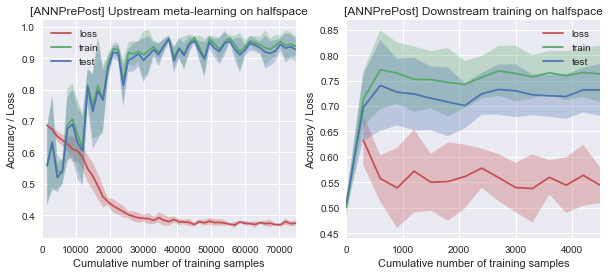

Mean essential stats across all runs:
Last upstream loss: 0.3742
Last upstream train accuracy: 0.9379
Last upstream test accuracy: 0.9272
Last downstream loss: 0.5446
Last downstream train accuracy: 0.7632
Last downstream test accuracy: 0.7316

Saving figure to: figs/comparing_transfer_ann_prepostall_halfspace


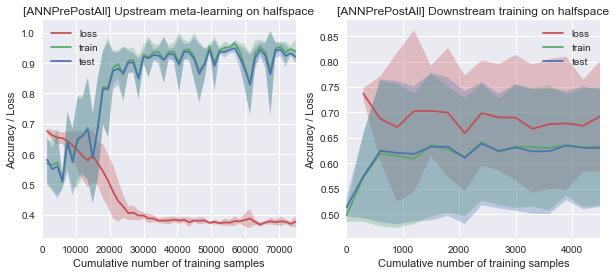

Mean essential stats across all runs:
Last upstream loss: 0.3774
Last upstream train accuracy: 0.9391
Last upstream test accuracy: 0.9212
Last downstream loss: 0.6926
Last downstream train accuracy: 0.6337
Last downstream test accuracy: 0.6300

Saving figure to: figs/comparing_transfer_ann_onepostall_halfspace


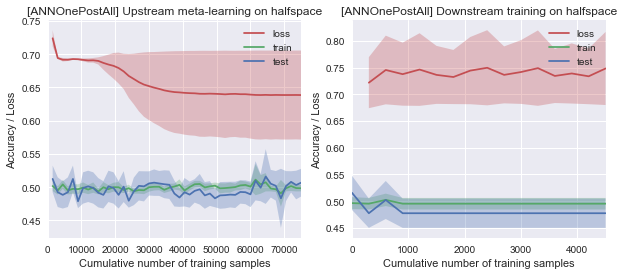

Mean essential stats across all runs:
Last upstream loss: 0.6385
Last upstream train accuracy: 0.4984
Last upstream test accuracy: 0.5068
Last downstream loss: 0.7485
Last downstream train accuracy: 0.4951
Last downstream test accuracy: 0.4772

Saving figure to: figs/comparing_transfer_ann_allpostall_halfspace


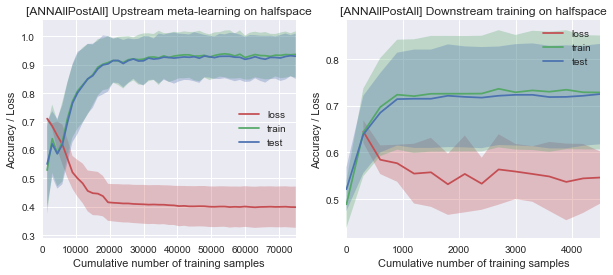

Mean essential stats across all runs:
Last upstream loss: 0.3993
Last upstream train accuracy: 0.9361
Last upstream test accuracy: 0.9296
Last downstream loss: 0.5462
Last downstream train accuracy: 0.7287
Last downstream test accuracy: 0.7252



In [5]:
# Plot aggregated stats.
agg_stats_ann_prepost_up = convert_multi_stats_uncertainty(stats_ann_prepost_up)
agg_stats_ann_prepost_down = convert_multi_stats_uncertainty(stats_ann_prepost_down)
plot_curves(agg_stats_ann_prepost_up, agg_stats_ann_prepost_down,
            '[ANNPrePost] Upstream meta-learning on ' + dataset_up,
            '[ANNPrePost] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_ann_prepost_' + dataset_up)
agg_stats_ann_prepostall_up = convert_multi_stats_uncertainty(stats_ann_prepostall_up)
agg_stats_ann_prepostall_down = convert_multi_stats_uncertainty(stats_ann_prepostall_down)
plot_curves(agg_stats_ann_prepostall_up, agg_stats_ann_prepostall_down,
            '[ANNPrePostAll] Upstream meta-learning on ' + dataset_up,
            '[ANNPrePostAll] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_ann_prepostall_' + dataset_up)
agg_stats_ann_onepostall_up = convert_multi_stats_uncertainty(stats_ann_onepostall_up)
agg_stats_ann_onepostall_down = convert_multi_stats_uncertainty(stats_ann_onepostall_down)
plot_curves(agg_stats_ann_onepostall_up, agg_stats_ann_onepostall_down,
            '[ANNOnePostAll] Upstream meta-learning on ' + dataset_up,
            '[ANNOnePostAll] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_ann_onepostall_' + dataset_up)
agg_stats_ann_allpostall_up = convert_multi_stats_uncertainty(stats_ann_allpostall_up)
agg_stats_ann_allpostall_down = convert_multi_stats_uncertainty(stats_ann_allpostall_down)
plot_curves(agg_stats_ann_allpostall_up, agg_stats_ann_allpostall_down,
            '[ANNAllPostAll] Upstream meta-learning on ' + dataset_up,
            '[ANNAllPostAll] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_ann_allpostall_' + dataset_up)

Saving figure to: figs/comparing_transfer_ann_halfspace


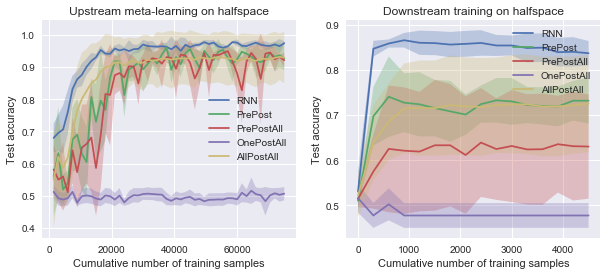

In [11]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_ann_prepost_up, agg_stats_ann_prepostall_up, agg_stats_ann_onepostall_up, agg_stats_ann_allpostall_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_ann_prepost_down, agg_stats_ann_prepostall_down, agg_stats_ann_onepostall_down, agg_stats_ann_allpostall_down]
labels = ['RNN', 'PrePost', 'PrePostAll', 'OnePostAll', 'AllPostAll']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/comparing_transfer_ann_' + dataset_up)